In [1]:
from keras.layers import Input, Dense
from keras.models import Model


In [2]:
encoding_dim = 32
img_dim = 784
input_img = Input(shape=(img_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(img_dim, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

In [6]:
autoencoder.layers

In [7]:
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [8]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [9]:
from keras.datasets import mnist
import numpy as np
(X_train, _), (X_test, _) = mnist.load_data()

In [10]:
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

In [11]:
print(X_test.shape, X_train.shape)

(10000, 784) (60000, 784)


In [14]:
autoencoder.fit(X_train,
                X_train, 
                epochs=50, 
                batch_size=256,
               shuffle=True,
               validation_data=(X_test, X_test),
               )

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 62us/step - loss: 0.3591 - val_loss: 0.2712
Epoch 2/50
60000/60000 [==============================] - 1s 11us/step - loss: 0.2639 - val_loss: 0.2530
Epoch 3/50
60000/60000 [==============================] - 1s 11us/step - loss: 0.2421 - val_loss: 0.2288
Epoch 4/50
60000/60000 [==============================] - 1s 11us/step - loss: 0.2204 - val_loss: 0.2100
Epoch 5/50
60000/60000 [==============================] - 1s 11us/step - loss: 0.2051 - val_loss: 0.1975
Epoch 6/50
60000/60000 [==============================] - 1s 11us/step - loss: 0.1939 - val_loss: 0.1875
Epoch 7/50
60000/60000 [==============================] - 1s 11us/step - loss: 0.1849 - val_loss: 0.1795
Epoch 8/50
60000/60000 [==============================] - 1s 11us/step - loss: 0.1774 - val_loss: 0.1726
Epoch 9/50
60000/60000 [==============================] - 1s 11us/step - loss: 0.1712 - val_loss: 0.1670
Epoch

In [17]:
encoded_imgs = encoder.predict(X_test)
decoded_imgs = decoder.predict(encoded_imgs)

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

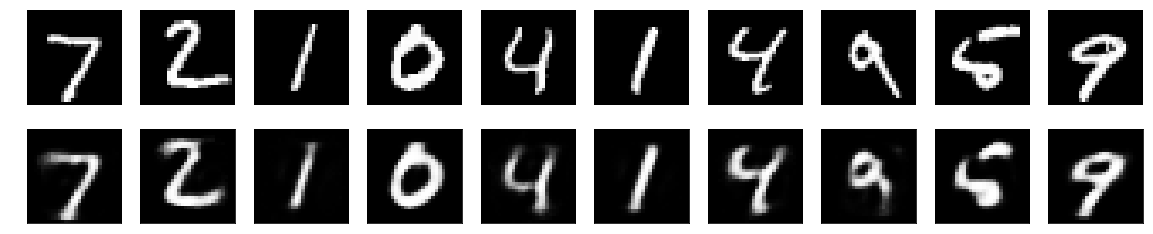

In [21]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(X_test[i].reshape(28,28))
    plt.gray()
    plt.axis('off')
    
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

### Adding a sparsity constraint on the encoded representations

In [22]:
from keras import regularizers

In [23]:
encoding_dim = 32
img_dim = 784
input_img = Input(shape=(img_dim,))
encoded = Dense(encoding_dim, activation='relu', activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = Dense(img_dim, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [24]:
autoencoder.fit(X_train,
                X_train, 
                epochs=100, 
                batch_size=256,
               shuffle=True,
               validation_data=(X_test, X_test),
               )

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 15us/step - loss: 0.6733 - val_loss: 0.6485
Epoch 2/100
60000/60000 [==============================] - 1s 12us/step - loss: 0.6284 - val_loss: 0.6090
Epoch 3/100
60000/60000 [==============================] - 1s 12us/step - loss: 0.5916 - val_loss: 0.5749
Epoch 4/100
60000/60000 [==============================] - 1s 12us/step - loss: 0.5598 - val_loss: 0.5454
Epoch 5/100
60000/60000 [==============================] - 1s 12us/step - loss: 0.5323 - val_loss: 0.5198
Epoch 6/100
60000/60000 [==============================] - 1s 12us/step - loss: 0.5084 - val_loss: 0.4975
Epoch 7/100
60000/60000 [==============================] - 1s 12us/step - loss: 0.4875 - val_loss: 0.4780
Epoch 8/100
60000/60000 [==============================] - 1s 12us/step - loss: 0.4692 - val_loss: 0.4609
Epoch 9/100
60000/60000 [==============================] - 1s 12us/step - loss: 0.4531 - val_loss: 0.4

60000/60000 [==============================] - 1s 11us/step - loss: 0.2828 - val_loss: 0.2826
Epoch 78/100
60000/60000 [==============================] - 1s 11us/step - loss: 0.2825 - val_loss: 0.2823
Epoch 79/100
60000/60000 [==============================] - 1s 11us/step - loss: 0.2822 - val_loss: 0.2820
Epoch 80/100
60000/60000 [==============================] - 1s 11us/step - loss: 0.2819 - val_loss: 0.2817
Epoch 81/100
60000/60000 [==============================] - 1s 12us/step - loss: 0.2816 - val_loss: 0.2814
Epoch 82/100
60000/60000 [==============================] - 1s 11us/step - loss: 0.2813 - val_loss: 0.2812
Epoch 83/100
60000/60000 [==============================] - 1s 11us/step - loss: 0.2810 - val_loss: 0.2809
Epoch 84/100
60000/60000 [==============================] - 1s 11us/step - loss: 0.2808 - val_loss: 0.2806
Epoch 85/100
60000/60000 [==============================] - 1s 11us/step - loss: 0.2805 - val_loss: 0.2804
Epoch 86/100
60000/60000 [========================

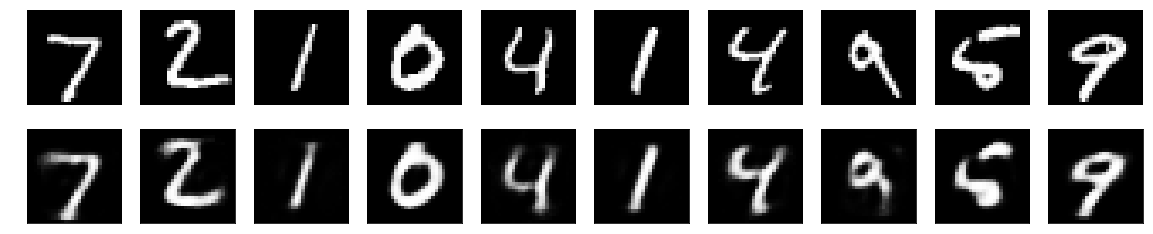

In [25]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(X_test[i].reshape(28,28))
    plt.gray()
    plt.axis('off')
    
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)